In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.rc('font', family='d2coding')

In [2]:
poker_df = pd.read_csv(r'C:\Users\user\Documents\GitHub\poker-game-data-analysis\포커 기록지.csv', index_col=0)

In [3]:
poker_df = poker_df.loc[:, ~poker_df.columns.str.startswith('Unnamed')]

In [4]:
poker_df

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
2024-02-21-01,-14200,NaN,NaN,2100.0,2900.0,-4000.0,NaN,13200.0
2024-02-21-02,-5300,NaN,NaN,-7600.0,-700.0,10300.0,NaN,3300.0
2024-02-21-03,9400,NaN,NaN,-1200.0,200.0,-2400.0,5100.0,-11100.0
2024-02-21-04,10800,NaN,NaN,-3700.0,NaN,-2300.0,-6500.0,1700.0
2024-02-21-05,-7900,NaN,NaN,0.0,-15000.0,-4300.0,5900.0,23000.0
2024-02-21-06,16200,NaN,NaN,10000.0,-1000.0,-8700.0,NaN,-15000.0
2024-02-21-07,-15000,NaN,NaN,5700.0,-5200.0,14800.0,NaN,-400.0
2024-02-21-08,-1800,NaN,NaN,-600.0,25500.0,-7300.0,NaN,-15000.0
2024-02-21-09,-6600,NaN,NaN,23700.0,NaN,3000.0,NaN,-20000.0
2024-02-25-01,-300,3000.0,8500.0,3700.0,-15000.0,NaN,NaN,NaN


In [5]:
poker_df.describe()

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
count,18.000000,6.000000,9.000000,15.000000,16.000000,12.000000,3.000000,9.000000
mean,55.555556,566.666667,-1411.111111,2040.000000,831.250000,-1325.000000,1500.000000,-2255.555556
std,10078.178070,15901.781871,9164.939231,10225.304746,13501.492201,8326.204527,6939.740629,14337.896560
min,-15000.000000,-15000.000000,-15000.000000,-15000.000000,-15000.000000,-15000.000000,-6500.000000,-20000.000000
25%,-6400.000000,-11425.000000,-9700.000000,-2450.000000,-7650.000000,-5575.000000,-700.000000,-15000.000000
50%,-3550.000000,-650.000000,-600.000000,2100.000000,-250.000000,-3200.000000,5100.000000,-400.000000
75%,10450.000000,4725.000000,7600.000000,6150.000000,3375.000000,3500.000000,5500.000000,3300.000000
max,16200.000000,28200.000000,8500.000000,23700.000000,29800.000000,14800.000000,5900.000000,23000.000000


In [6]:
pd.DataFrame(poker_df.sum(), columns=["누적 수익"]).T

,임동휘,남형준,이도훈,권주찬,오준혁,김태윤,정재영,유승훈
누적 수익,1000.0,3400.0,-12700.0,30600.0,13300.0,-15900.0,4500.0,-20300.0


In [7]:
for col in poker_df.columns:
    data = poker_df[col].dropna()
    skew_val = skew(data)
    kurt_val = kurtosis(data)
    print(f'Column: {col}, Skewness: {skew_val}, Kurtosis: {kurt_val}')

Column: 임동휘, Skewness: 0.2214456931877184, Kurtosis: -1.3049357201618794
Column: 남형준, Skewness: 0.7828849176742575, Kurtosis: -0.4270042957703941
Column: 이도훈, Skewness: -0.23658723469430093, Kurtosis: -1.509536783214242
Column: 권주찬, Skewness: 0.3321826470270216, Kurtosis: -0.03923159888700978
Column: 오준혁, Skewness: 0.7375551148955698, Kurtosis: -0.06290581432734665
Column: 김태윤, Skewness: 0.46531207751194886, Kurtosis: -0.37232815826615173
Column: 정재영, Skewness: -0.6965500623812215, Kurtosis: -1.5
Column: 유승훈, Skewness: 0.4328023919234718, Kurtosis: -0.9265080229436125


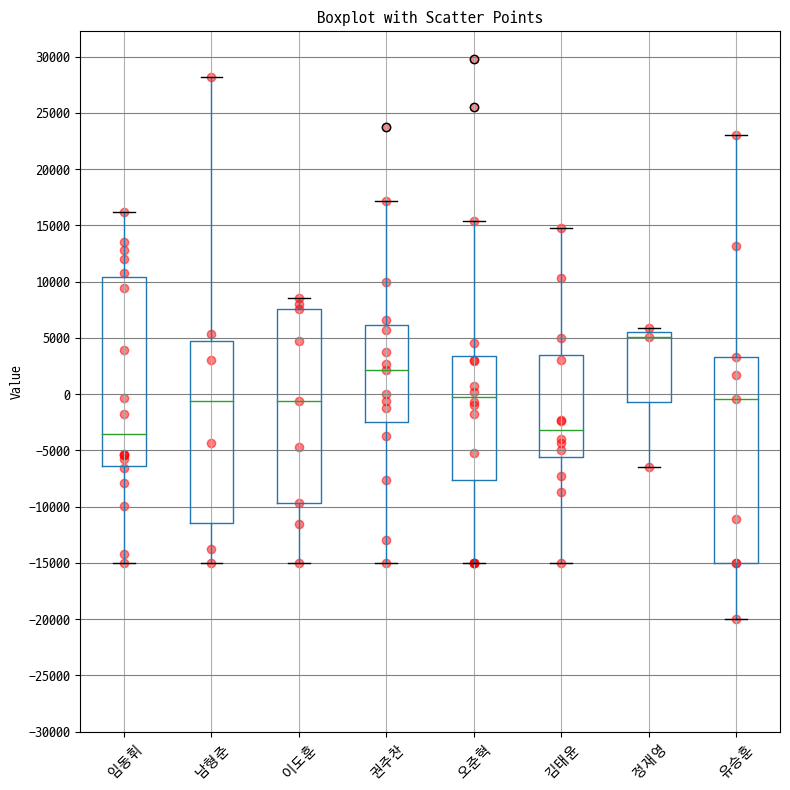

In [8]:
plt.figure(figsize=(8, 8))
poker_df.boxplot()

# 각각의 값들에 대한 scatter plot 추가
for i, col in enumerate(poker_df.columns):
    x = [i + 1] * poker_df[col].count() 
    plt.scatter(x, poker_df[col].dropna(), color='red', alpha=0.5)

plt.title('Boxplot with Scatter Points')
plt.ylabel('Value')
plt.xticks(ticks=range(1, len(poker_df.columns) + 1), labels=poker_df.columns, rotation=45)  # x축 라벨 설정
plt.yticks(range(-30000, 30001, 5000))  # y축 눈금 설정
plt.grid(axis='y', color='gray', linestyle='-')  # y축 그리드 설정
plt.tight_layout()
plt.show()


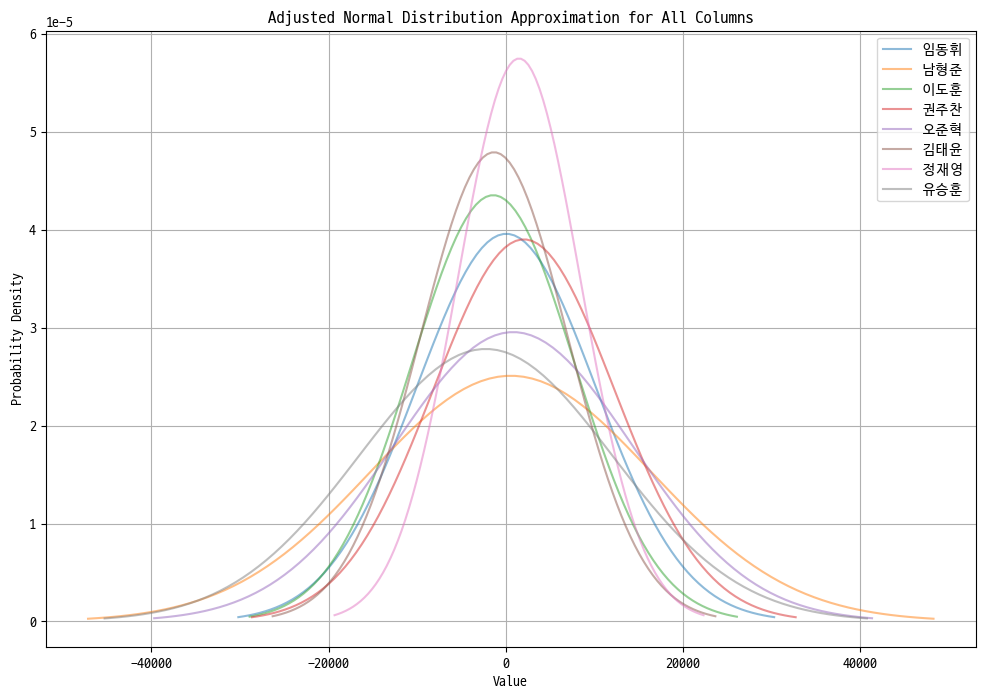

In [9]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 그래프 그리기
for col in poker_df.columns:
    data = poker_df[col].dropna()
    mean = data.mean()
    std = data.std()

    # 왜도를 고려하여 정규 분포를 근사화하기 위한 x 값 생성
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # 정규 분포 함수 값 계산
    y = norm.pdf(x, mean, std)
    
    # 조정된 정규 분포 함수 값 계산
    adj_y = norm.pdf(x, mean, std)
    
    # 그래프 그리기
    plt.plot(x, adj_y, label=f'{col}', alpha=0.5)

plt.title('Adjusted Normal Distribution Approximation for All Columns')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


 - skewness가 1 이상이면 정규분포 근사가 어려움

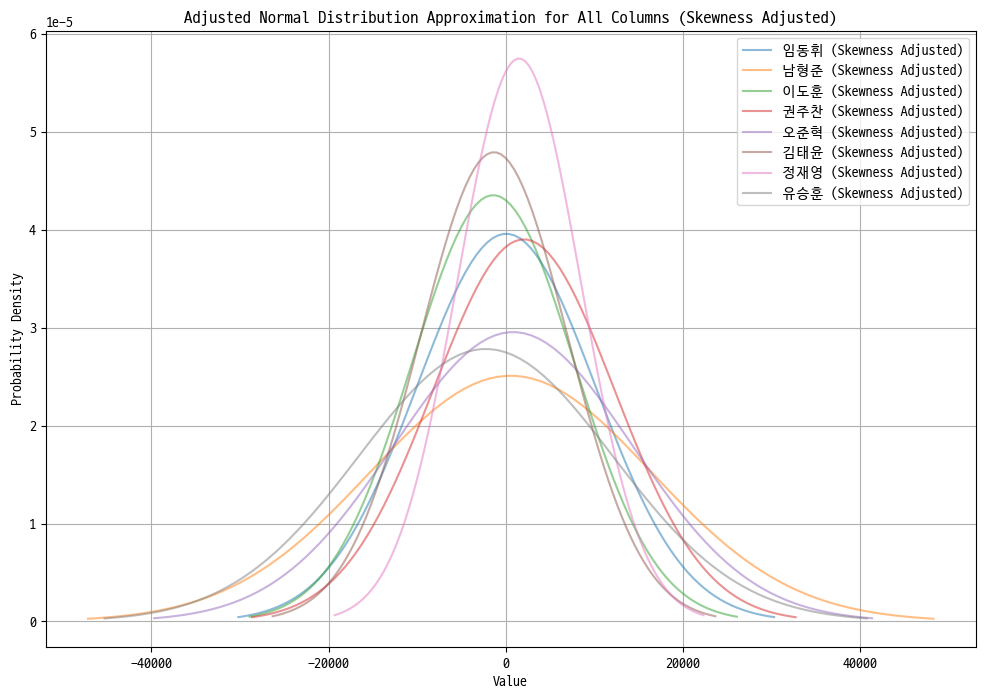

In [10]:
# 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 컬럼 별로 그래프 그리기
for col in poker_df.columns:
    data = poker_df[col].dropna()
    mean = data.mean()
    std = data.std()
    skewness = skew(data)

    # 왜도가 1보다 큰 경우에는 로그 변환을 적용하여 데이터 보정
    
    
    # 보정된 데이터로부터 평균과 표준편차 다시 계산
    mean = data.mean()
    std = data.std()

    # 왜도를 고려하여 정규 분포를 근사화하기 위한 x 값 생성
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # 정규 분포 함수 값 계산
    y = norm.pdf(x, mean, std)
    
    # 그래프 그리기
    plt.plot(x, y, label=f'{col} (Skewness Adjusted)', alpha=0.5)
    
plt.title('Adjusted Normal Distribution Approximation for All Columns (Skewness Adjusted)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()
